## Dataset Description

You have been provided power consumption data of 1000 households. 

Attribute Information:

1.date: Date in format dd/mm/yyyy 
2.time: time in format hh:mm:ss 
3.global_active_power: household global minute-averaged active power (in kilowatt) 
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 
5.voltage: minute-averaged voltage (in volt) 
6.global_intensity: household global minute-averaged current intensity (in ampere) 
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

**Problem Statement ** Cluster the households using any clustering algorithm based on their power consumption and give analysis of your clusters.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('power_consumption.csv', sep=';')

In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
Date                     999 non-null object
Time                     999 non-null object
Global_active_power      999 non-null float64
Global_reactive_power    999 non-null float64
Voltage                  999 non-null float64
Global_intensity         999 non-null float64
Sub_metering_1           999 non-null float64
Sub_metering_2           999 non-null float64
Sub_metering_3           999 non-null float64
dtypes: float64(7), object(2)
memory usage: 70.3+ KB


## Question : Perform Feature Engineering on the columns of the dataset

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y', errors = 'coerce')

In [7]:
df['Time'] = pd.to_datetime(df['Time'], format = '%H:%M:%S', errors = 'coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
Date                     999 non-null datetime64[ns]
Time                     999 non-null datetime64[ns]
Global_active_power      999 non-null float64
Global_reactive_power    999 non-null float64
Voltage                  999 non-null float64
Global_intensity         999 non-null float64
Sub_metering_1           999 non-null float64
Sub_metering_2           999 non-null float64
Sub_metering_3           999 non-null float64
dtypes: datetime64[ns](2), float64(7)
memory usage: 70.3 KB


## Question : Perform Descriptive Statistics on the dataset and come up with insights on shape, spread and central deviation 

In [9]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,999.000000,999.000000,999.000000,999.000000,999.0,999.000000,999.000000
mean,2.418136,0.089261,240.038278,10.347948,0.0,2.751752,5.743744
std,1.240437,0.088127,4.085708,5.123870,0.0,8.107645,8.061661
min,0.206000,0.000000,230.980000,0.800000,0.0,0.000000,0.000000
25%,1.802000,0.000000,236.940000,8.400000,0.0,0.000000,0.000000
50%,2.414000,0.072000,240.650000,10.000000,0.0,0.000000,0.000000
75%,3.308000,0.126000,243.300000,14.000000,0.0,1.000000,17.000000
max,7.706000,0.528000,249.370000,33.200000,0.0,38.000000,19.000000


Measure of the spread can also be visualised using difference between max-Q3 & Q1-min. Also if the std is too high compared 
to the mean it means the distribution is not normal and there are many outliers in the data.

Since all values for the Sub_metering_1 is zero we will drop that column from the dataframe.

In [10]:
df.drop(['Sub_metering_1'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
Date                     999 non-null datetime64[ns]
Time                     999 non-null datetime64[ns]
Global_active_power      999 non-null float64
Global_reactive_power    999 non-null float64
Voltage                  999 non-null float64
Global_intensity         999 non-null float64
Sub_metering_2           999 non-null float64
Sub_metering_3           999 non-null float64
dtypes: datetime64[ns](2), float64(6)
memory usage: 62.5 KB


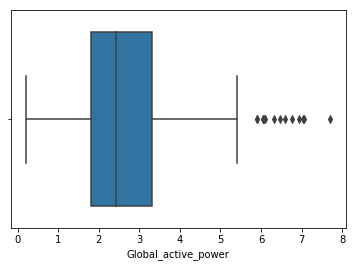

In [12]:
sns.boxplot(x = df['Global_active_power'])

Global_active_power is a right skewed(positive skewed) data because of the presence of outliers.

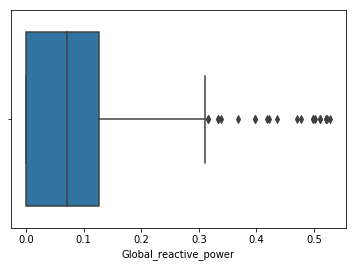

In [13]:
sns.boxplot(x = df['Global_reactive_power'])

Global_reactive_power is a left skewed(negatively skewed) data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BFC0588>,
      dtype=object)

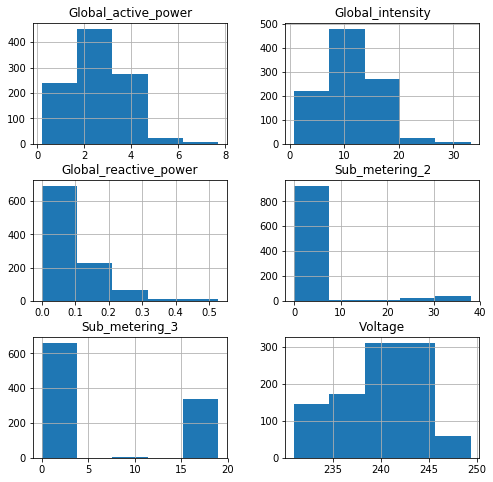

In [14]:
df.hist(bins=5, figsize=(8,8))

Doesn't look like columns such as  Sub_metering_2, Sub_metering_3 have a normal distribution

Global_active_power and Global_intensity both graphs looks same. They might be strongly correlated.

import pandas as pd
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

Additional tip for normalizing the values in the dataframe

## Question: Perform EDA and check if you can find any correlation between columns

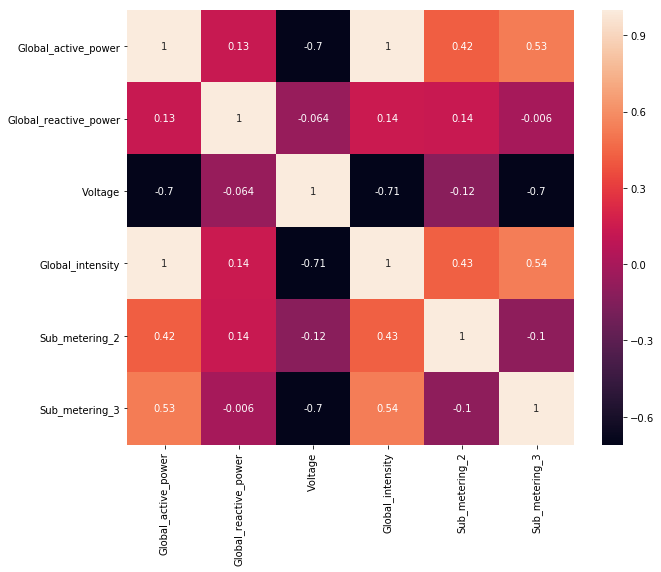

In [15]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.show()

Global active power has positive correlation with Sub_metering_3 and Sub_metering_2. No correlation with Sub_metering_1. Negative corrleation with voltage. Perfect correlation with the Global_intensity.

Voltage is negatively correlated with Sub_metering_3, Global_active_power and Global_intensity. It has negligible correlation with others.

## Question : Identify optimal number of clusters using Elbow Method

Since we need only numerical columns to deal with the clustering algorithm we will drop Date and Time column from the data frame.

In [16]:
new_df = df.drop(['Date', 'Time'], axis=1)

In [17]:
ssw = []
cluster_range = range(1,10)

for i in cluster_range:
    model = KMeans(n_clusters = i, random_state = 88)
    model.fit(new_df)
    ssw.append(model.inertia_)

In [18]:
print(ssw)
print('Number of ssw items', len(ssw))

[174867.34562906105, 92841.35403275334, 28808.898459690125, 21135.553991877423, 17775.550044434945, 14647.537530871527, 13212.764635297739, 10764.783022333319, 9360.92859170309]
Number of ssw items 9


### Plot to find the elbow point

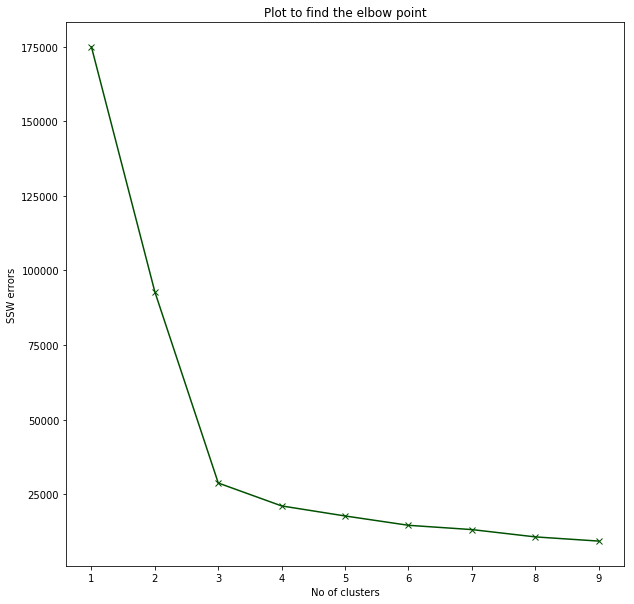

In [19]:
plt.figure(figsize=(10,10))
plt.plot(cluster_range, ssw, marker='x', color='#005000')
plt.xlabel('No of clusters')
plt.ylabel('SSW errors')
plt.title('Plot to find the elbow point')
plt.show()

According to the plot the elbow point suggests that no. of clusters should be 3.

### Building k-Means model with 3 clusters

In [22]:
kMeans = KMeans(n_clusters=3, random_state=88)

### Fit the model

In [23]:
k_model = kMeans.fit(new_df)

Get the centroid points of all clusters

In [24]:
k_model.cluster_centers_

array([[1.75123888e+00, 8.73311367e-02, 2.42381269e+02, 7.53871499e+00,
        6.45799012e-01, 2.30642504e-02],
       [4.24018182e+00, 1.15878788e-01, 2.38491061e+02, 1.80787879e+01,
        3.21818182e+01, 2.54545455e+00],
       [3.29099387e+00, 8.74662577e-02, 2.35988957e+02, 1.40134969e+01,
        7.14723926e-01, 1.70429448e+01]])

Start grouping them using labels of the model

In [25]:
clusters = k_model.labels_
print(clusters)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 

Add one more column to the new_df called clusters.

In [27]:
new_df['clusters'] = clusters

In [28]:
new_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_3,clusters
0,4.216,0.418,234.84,18.4,1.0,17.0,2
1,5.360,0.436,233.63,23.0,1.0,16.0,2
2,5.374,0.498,233.29,23.0,2.0,17.0,2
3,5.388,0.502,233.74,23.0,1.0,17.0,2
4,3.666,0.528,235.68,15.8,1.0,17.0,2


In [29]:
new_df.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_3,clusters
994,2.288,0.056,238.09,9.6,0.0,0.0,0
995,2.296,0.054,238.13,9.6,0.0,0.0,0
996,2.292,0.054,238.03,9.6,0.0,0.0,0
997,0.370,0.000,240.26,2.4,0.0,0.0,0
998,0.472,0.000,240.15,2.4,0.0,0.0,0


## Question : Visualize the clusters and come up with your analysis

In [30]:
new_df.groupby('clusters').size()

clusters
0    607
1     66
2    326
dtype: int64

In [31]:
centroid_df = pd.DataFrame(k_model.cluster_centers_, columns=['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_2','Sub_metering_3'])

In [33]:
centroid_df.head()
#Here there are 3 clusters - 0,1,2. and all these are the diff centroids of each clusters. 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_3
0,1.751239,0.087331,242.381269,7.538715,0.645799,0.023064
1,4.240182,0.115879,238.491061,18.078788,32.181818,2.545455
2,3.290994,0.087466,235.988957,14.013497,0.714724,17.042945


Since Global_reactive_power doesnt seem to have much effect. we can remove them from df for easy plotting purpose.

In [36]:
new_df.drop(['Global_reactive_power'], axis=1, inplace=True)

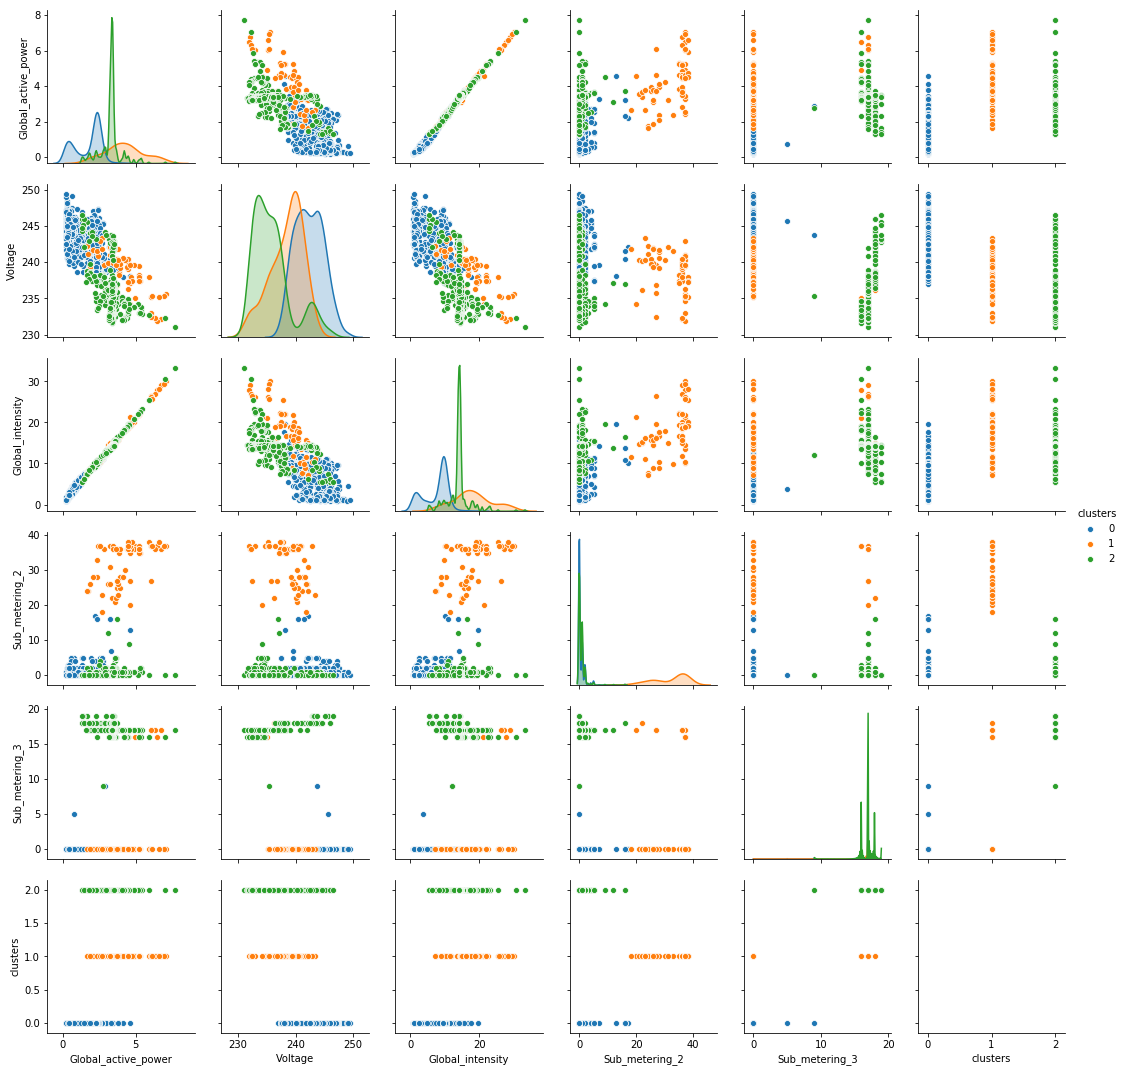

In [37]:
sns.pairplot(new_df, hue='clusters')

Most of the data falls under cluster 0 (607 observations), then comes cluster 2(326 observations) and least is 1 (66 observations)

### The End